# **ACTIVITY 1**

In [19]:
import pandas as pd
df=pd.read_csv("Telco Customer Churn.csv")

In [20]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
df.drop("customerID",axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
binary_cols=['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0,'No internet service':0,'No phone service':0})

In [23]:
multi_cols=['gender','MultipleLines','InternetService','Contract','PaymentMethod']
df=pd.get_dummies(df, columns=multi_cols, drop_first=True)


In [24]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df['TotalCharges']=df['TotalCharges'].fillna(0)
X=df.drop('Churn',axis=1)
y=df['Churn']

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
x_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train_scaled,y_train)
y_pred=logistic_regression.predict(x_test_scaled)
y_pred[0:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")



Accuracy: 0.820
Precision: 0.685
Recall: 0.595
F1-score: 0.637


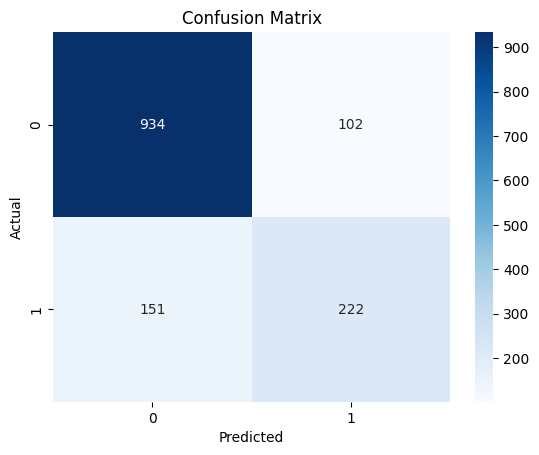

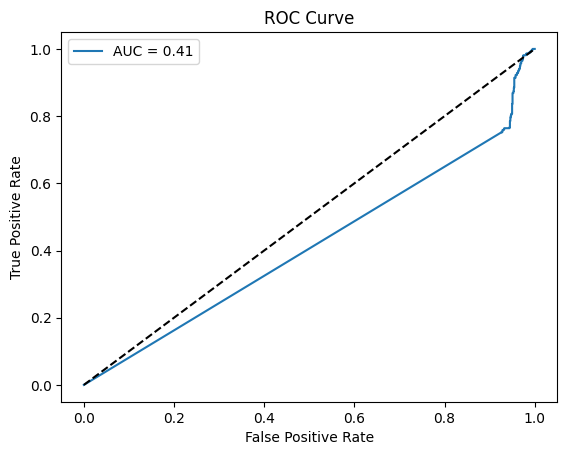

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
y_pred_prob = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [31]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
new_data=pd.DataFrame([{
    'SeniorCitizen': 1,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 15,
    'PhoneService': 0,
    'OnlineSecurity': 0,
    'OnlineBackup': 0,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 0,
    'StreamingMovies': 0,
    'PaperlessBilling': 0,
    'MonthlyCharges': 459.0,
    'TotalCharges': 100.23,
    'gender_Male': 0,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_Fiber optic': 1,
    'InternetService_No': 0,
    'Contract_One year': 1,
    'Contract_Two year': 0,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0
}])
new_data_scaled=scaler.fit_transform(new_data)

try:
    predictions=logistic_regression.predict(new_data_scaled)
    if predictions==1:
        
        print("Customer will Churn")
    else:
        print("Customer will not Churn")
except Exception as e:
    print("Error during prediction:", e)


Customer will not Churn


c:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Activity 2**


In [38]:
df2=pd.read_csv("Car Price Prediction.csv")
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
X=df2[['horsepower','enginesize','citympg']]
y=df2['price']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
lr=LinearRegression()
lr.fit(X,y)
y_pred_lr=lr.predict(X)
y_pred_lr[:5]

array([14457.35933922, 14457.35933922, 19241.89060693, 11143.2802727 ,
       15722.66489154])

In [44]:
print("Linear Regression R2: ",r2_score(y,y_pred_lr)*100)
print("Linear Regression Mean Squared error: ",np.sqrt(mean_squared_error(y,y_pred_lr)))

Linear Regression R2:  79.6783350787116
Linear Regression Mean Squared error:  3592.5447771905574


Polynomial Regression (degree=2)
R2: 0.8278710544945495
RMSE: 3306.3551476137463


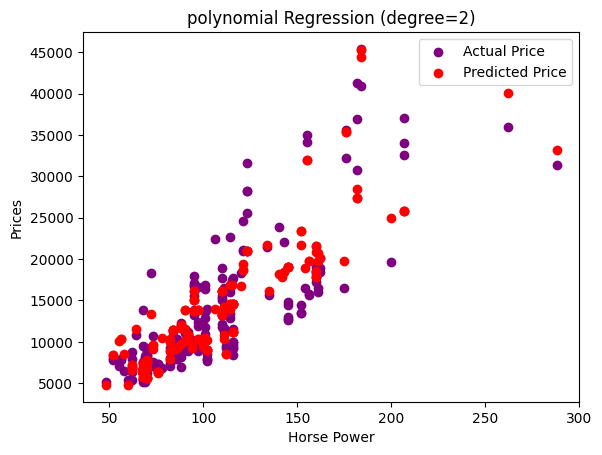

Polynomial Regression (degree=3)
R2: 0.8697273820313423
RMSE: 2876.3989213264535


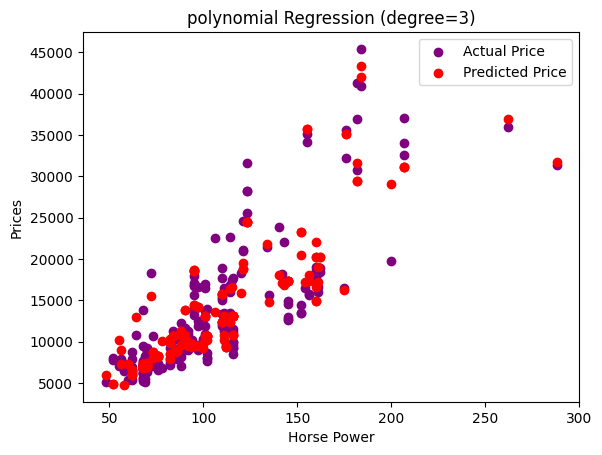

Polynomial Regression (degree=4)
R2: 0.9140078883297235
RMSE: 2336.963092816523


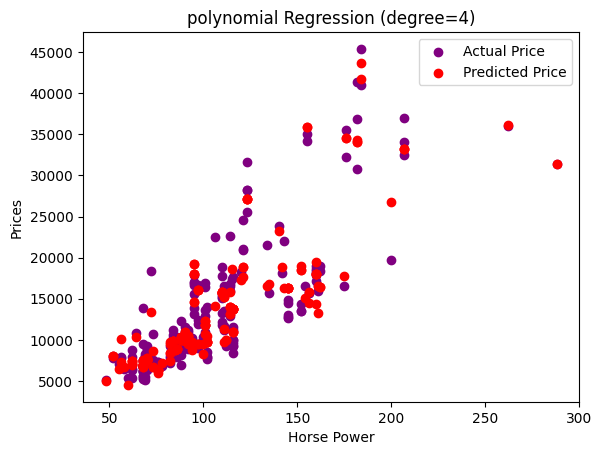

In [52]:
from sklearn.preprocessing import PolynomialFeatures

for degree in [2,3,4]:
    polynomial=PolynomialFeatures(degree=degree)
    X_poly=polynomial.fit_transform(X)
    poly_reg=LinearRegression()
    poly_reg.fit(X_poly,y)
    
    y_pred_poly=poly_reg.predict(X_poly)
    print(f"Polynomial Regression (degree={degree})")
    print("R2:", r2_score(y, y_pred_poly))
    print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_poly)))

    plt.scatter(df2['horsepower'],y,color="purple",label='Actual Price')
    plt.scatter(df2['horsepower'],y_pred_poly,color="red",label='Predicted Price')
    plt.title(f"polynomial Regression (degree={degree})")
    plt.xlabel("Horse Power")
    plt.ylabel("Prices")
    plt.legend()
    plt.show()  
    

In [53]:
import matplotlib.pyplot as plt
